<a href="https://colab.research.google.com/github/Jose-Codes/INIT_Intro_To_ML_Series/blob/main/INIT_ML_Lecture_2_Logistic_Regression_and_Intro_to_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 2: Logistic Regression and Intro to Linear Algebra.ipynb

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Review Linear Regression with Gradient Descent

### Linear Regression Model

Recall from the previous lecture the format of a linear regression model:

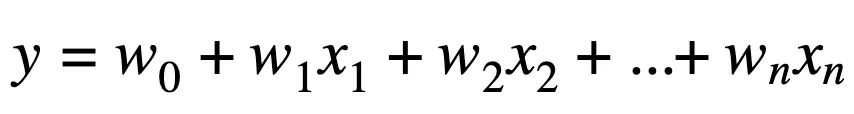

$$y = w_0 + w_1 x_1 + w_2 x_2 + ...+ w_n x_n$$

*   y: Output Variable (Target Prediction).
*   x: Input variable, in ML we call them “features.”
*   w_0: The bias term (also referenced as b)
*   w_i: Regression coefficient, we call these the model weights (where w_i is the ith weight so for the 1st feature w_i = w_1).

Recall also how we measure how well our model performs, for regression tasks we can use the Mean Squared Error.

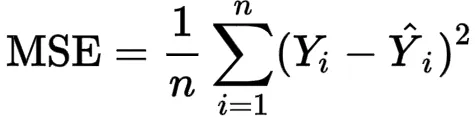

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$
*   MSE stands for Mean Squared Error
*   Y_i: True value (Target value)
*   Ŷ_i: Our model's prediction
*   (Y_i - Ŷ_i)^2 Square difference between the Target Value and the Predicted value (our squared error)
*   𝚺ni = 1 the greek letter sigma (𝚺) denotes “sum of,” so we are summing up all of the squared errors in our dataset, assuming we have n data points, we sum up from our first data point i = 1, to our last data point i = n, where the ith term is the squared error of the ith data point.
*   1/n: We divide by the total number of data points to get our average.



In [21]:
class LinearRegression:
    """
    A simple linear regression model implemented from scratch.
    """

    def __init__(self): # Constructor of the class
        """
        Initialize the linear regression model.
        """
        # These our are class attributes
        self.weights = None
        self.bias = None
        self.cost_history = [] # It is just for plotting

    def initialize_parameters(self, n_features):
        """
        Initialize model parameters.

        Parameters:
            n_features (int): Number of features in the dataset
        """
        # There are better are intialization techniques
        # -> Xavier Intialization
        self.weights = np.zeros(n_features) # is an array of zeros [0, 0, ..., n]
        self.bias = 0


    def predict(self, X):
        """
        Make predictions using the current model parameters.

        Parameters:
            X (numpy.ndarray): Features matrix of shape (n_samples, n_features)

        Returns:
            numpy.ndarray: Predicted values for each data point in the sample
        """
        predictions = np.zeros(X.shape[0]) # Create an array to hold the predictions
        for i in range(X.shape[0]): # Iterate over all the examples
            for j in range(X.shape[1]): # Iterate over every feature
                predictions[i] += X[i][j] * self.weights[j] # perform y = W * X
            predictions[i] += self.bias

        # We will learn a better and compuationally faster way of doing the above
        # calculations namely:
        # np.dot(X, self.weights) + self.bias
        # Later in this lecture we will learn about the dot product which is
        # essentially the sum of the element-wise multiplication of two arrays (vectors)

        # When you go iterative you only go 1 at a time
        # But with better hardware you can do parallel operations and do let's
        # 100 summations at a time
        # -> Summations are every weight * feature
        # So it can be 100x faster
        return predictions


    def compute_cost(self, X, y):
        """
        Compute the Mean Squared Error cost.

        Parameters:
            X (numpy.ndarray): Features matrix (n_samples, m_features)
            y (numpy.ndarray): Target values (n_samples,)

        Returns:
            float: Mean Squared Error
        """
        n_samples = X.shape[0] # Shape is a function the dimensions of your array in our case we have (n_training_examples, n_features)
        predictions = self.predict(X)
        sum_of_squared_errors = np.sum((predictions - y) ** 2) # Sum of [(y_hat - y_true) ^ 2]
        mean_squared_error = (1 / n_samples) * sum_of_squared_errors
        return mean_squared_error

    def compute_gradients(self, X, y):
        """
        Compute the gradients of the cost function with respect to weights and bias.

        Parameters:
            X (numpy.ndarray): Features matrix
            y (numpy.ndarray): Target values

        Returns:
            dict: Gradients for weights and bias
        """
        n_samples = X.shape[0]
        y_pred = self.predict(X)

        dw = np.zeros(X.shape[1])
        for i in range(n_samples): # Go through every data point in the sample
            for j in range(dw.shape[0]): # Go through every weight
                dw[j] += (y_pred[i] - y[i]) * X[i][j] # dw = (y_hat - y_true) * x_i

        dw = (2 / n_samples) * dw # Element-wise division
        db = (2 / n_samples) * np.sum(y_pred - y)

        return {'weights': dw, 'bias': db}

    def update_parameters(self, gradients, learning_rate):
        """
        Update model parameters using gradients.

        Parameters:
            gradients (dict): Gradients for weights and bias
            learning_rate (float): Learning rate for parameter updates
        """
        self.weights -= learning_rate * gradients['weights'] # [-0.2, 0.3, 0.4]
        self.bias -= learning_rate * gradients['bias']

    def fit(self, X, y, optimizer):
        """
        Train the model using the provided optimizer.

        Parameters:
            X (numpy.ndarray): Features matrix
            y (numpy.ndarray): Target values
            optimizer: Optimization algorithm (e.g., GradientDescent)

        Returns:
            self: The trained model
        """
        n_samples, n_features = X.shape

        # Initialize parameters if not done already
        if self.weights is None:
            self.initialize_parameters(n_features)

        # Optimize model parameters
        self, self.cost_history = optimizer.optimize(self, X, y)

        return self

    def score(self, X, y):
        """
        Calculate the coefficient of determination (R²).

        Parameters:
            X (numpy.ndarray): Features matrix
            y (numpy.ndarray): Target values

        Returns:
            float: R² score
        """
        y_pred = self.predict(X)
        ss_total = np.sum((y - np.mean(y)) ** 2)
        ss_residual = np.sum((y - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2

    def plot_cost_history(self):
        """
        Plot the cost history during training.
        """
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(self.cost_history)), self.cost_history)
        plt.title('Cost vs Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.grid(True)
        plt.show()

### Gradient Descent Implementation

Remember that to optimize a function with take it's derivative. The function we are trying to optimize is our Cost (Loss) function which is a function that depends on parameters w and b: $${J(w,b)}$$ Therefore we have to take a partial derivative since we have multiple variables.

$$\text{MSE} = {J(w,b)} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

Recall the Gradient Updates for our model parameters which are the weights and the bias.

For weights:
$$\frac{\partial J}{\partial \mathbf{w}} = \frac{2}{m} \sum_{i=1}^{m} ( y^{(i)} - (\mathbf{w}* \mathbf{x}^{(i)} + b)) \cdot \mathbf{x}^{(i)}$$

For bias:
$$\frac{\partial J}{\partial b} = \frac{2}{m} \sum_{i=1}^{m} (y^{(i)} - (\mathbf{w}* \mathbf{x}^{(i)} + b))$$


In [22]:
class GradientDescent:
    """
    A standalone Gradient Descent optimizer class.
    """

    def __init__(self, learning_rate=0.01, iterations=1000, batch_size=None):
        """
        Initialize the gradient descent optimizer.

        Parameters:
            learning_rate (float): The step size for parameter updates
            iterations (int): Number of iterations to run
            batch_size (int or None): Batch size for mini-batch gradient descent.
                                      If None, use batch gradient descent.
        """
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.batch_size = batch_size
        self.cost_history = []

    def optimize(self, model, X, y):
        """
        Optimize model parameters using gradient descent.

        Parameters:
            model: The model to optimize (must have predict, compute_gradients,
                   update_parameters, and compute_cost methods)
            X (numpy.ndarray): Features matrix
            y (numpy.ndarray): Target values

        Returns:
            model: The optimized model
            cost_history (list): History of cost values during training
        """
        n_samples = X.shape[0]
        cost_history = []

        for i in range(self.iterations):
            # For batch gradient descent
            if self.batch_size is None:
                # Compute gradients and cost
                gradients = model.compute_gradients(X, y)
                cost = model.compute_cost(X, y)

                # Update model parameters
                model.update_parameters(gradients, self.learning_rate)

            # For mini-batch gradient descent
            else:
                # Shuffle data
                indices = np.random.permutation(n_samples)
                X_shuffled = X[indices]
                y_shuffled = y[indices]

                # Process mini-batches
                for j in range(0, n_samples, self.batch_size):
                    end = min(j + self.batch_size, n_samples)
                    X_batch = X_shuffled[j:end]
                    y_batch = y_shuffled[j:end]

                    # Compute gradients for this batch
                    gradients = model.compute_gradients(X_batch, y_batch)

                    # Update model parameters
                    model.update_parameters(gradients, self.learning_rate)

                # Compute cost on full dataset after each epoch
                cost = model.compute_cost(X, y)

            # Record cost
            cost_history.append(cost)

            # Print cost every 100 iterations
            if (i + 1) % 100 == 0:
                print(f'Iteration {i+1}/{self.iterations}, Cost: {cost:.6f}')

        return model, cost_history

### Linear Regression Demo with random data

In [23]:
# Example usage:
def demo_with_synthetic_data():
    """
    Demonstrate the LinearRegression class with synthetic data.
    """
    # Generate synthetic data
    np.random.seed(42)
    X = 2 * np.random.rand(100, 3)  # 100 samples, 3 features [ [0.2, 0.3, 0.5], [.. , .., ..], ... n ]
    y = 4 + 3 * X[:, 0] + 2 * X[:, 1] + 1.5 * X[:, 2] + np.random.randn(100)  # True coefficients: [3, 2, 1.5], bias: 4

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create model and optimizer
    optimizer = GradientDescent(learning_rate=0.1, iterations=1000)
    model = LinearRegression()

    # Train model
    model.fit(X_train_scaled, y_train, optimizer)

    # Evaluate model
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)

    print(f"\nTraining R² score: {train_score:.4f}")
    print(f"Testing R² score: {test_score:.4f}")
    print(f"Learned weights: {model.weights}")
    print(f"Learned bias: {model.bias:.4f}")

    # Plot cost history
    model.plot_cost_history()

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Plot predictions vs actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted Values')
    plt.grid(True)
    plt.show()


# Example with real data
def demo_with_real_data(X, y):
    """
    Demonstrate the LinearRegression class with real data.

    Parameters:
        X (numpy.ndarray): Features matrix
        y (numpy.ndarray): Target values
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create model and optimizer
    model = LinearRegression()
    optimizer = GradientDescent(learning_rate=0.01, iterations=1000)

    # Train model
    model.fit(X_train_scaled, y_train, optimizer)

    # Evaluate model
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)

    print(f"\nTraining R² score: {train_score:.4f}")
    print(f"Testing R² score: {test_score:.4f}")
    print(f"Learned weights: {model.weights}")
    print(f"Learned bias: {model.bias:.4f}")

    # Plot cost history
    model.plot_cost_history()

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Plot predictions vs actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted Values')
    plt.grid(True)
    plt.show()

Iteration 100/1000, Cost: 0.700261
Iteration 200/1000, Cost: 0.700261
Iteration 300/1000, Cost: 0.700261
Iteration 400/1000, Cost: 0.700261
Iteration 500/1000, Cost: 0.700261
Iteration 600/1000, Cost: 0.700261
Iteration 700/1000, Cost: 0.700261
Iteration 800/1000, Cost: 0.700261
Iteration 900/1000, Cost: 0.700261
Iteration 1000/1000, Cost: 0.700261

Training R² score: 0.8814
Testing R² score: 0.7635
Learned weights: [1.72992666 1.22159762 1.06527709]
Learned bias: 10.4856


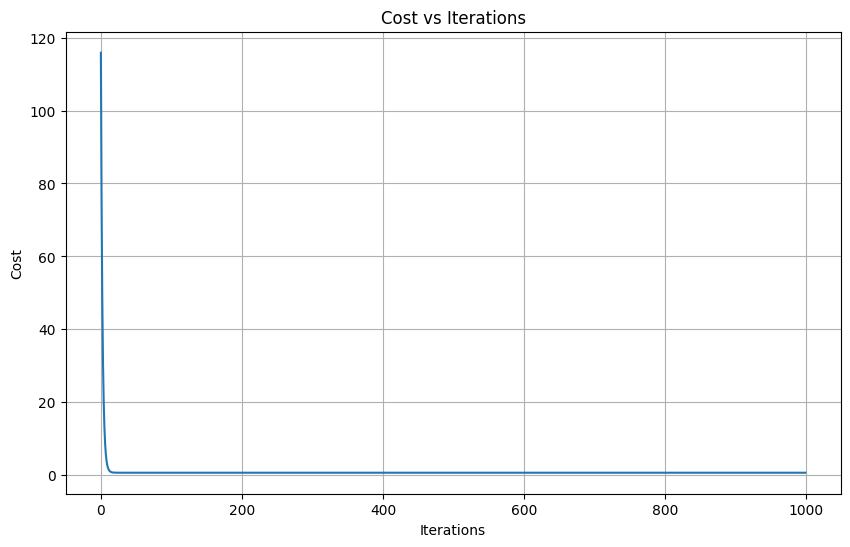

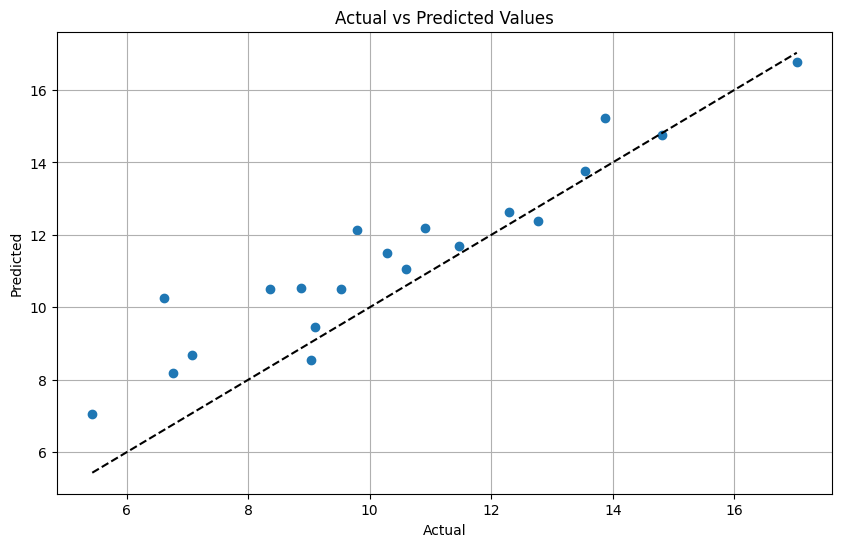

In [24]:
demo_with_synthetic_data()

### Linear Regression Simple Kaggle Example

In [25]:
!wget https://raw.githubusercontent.com/Jose-Codes/INIT_Intro_To_ML_Series/main/Lecture_2_Logistic_Regression_NNs/Salary_Data.csv.zip

--2025-03-24 21:45:02--  https://raw.githubusercontent.com/Jose-Codes/INIT_Intro_To_ML_Series/main/Lecture_2_Logistic_Regression_NNs/Salary_Data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1383 (1.4K) [application/zip]
Saving to: ‘Salary_Data.csv.zip.1’

Salary_Data.csv.zip 100%[===================>]   1.35K  --.-KB/s    in 0s      

2025-03-24 21:45:02 (19.4 MB/s) - ‘Salary_Data.csv.zip.1’ saved [1383/1383]



In [26]:
!unzip /content/Salary_Data.csv.zip

Archive:  /content/Salary_Data.csv.zip
replace Salary Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Salary Data.csv         
replace __MACOSX/._Salary Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._Salary Data.csv  


In [27]:
salary_data = pd.read_csv("/content/Salary Data.csv")
salary_data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


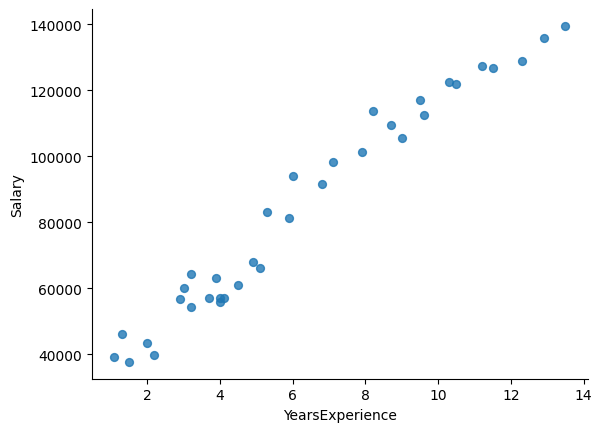

In [28]:
salary_data.plot(kind='scatter', x='YearsExperience', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Iteration 100/1000, Cost: 170906331.967557
Iteration 200/1000, Cost: 33351581.776543
Iteration 300/1000, Cost: 30932276.174820
Iteration 400/1000, Cost: 30889725.557074
Iteration 500/1000, Cost: 30888977.179081
Iteration 600/1000, Cost: 30888964.016649
Iteration 700/1000, Cost: 30888963.785148
Iteration 800/1000, Cost: 30888963.781077
Iteration 900/1000, Cost: 30888963.781005
Iteration 1000/1000, Cost: 30888963.781004

Training R² score: 0.9716
Testing R² score: 0.8914
Learned weights: [32528.9793571]
Learned bias: 81163.9999


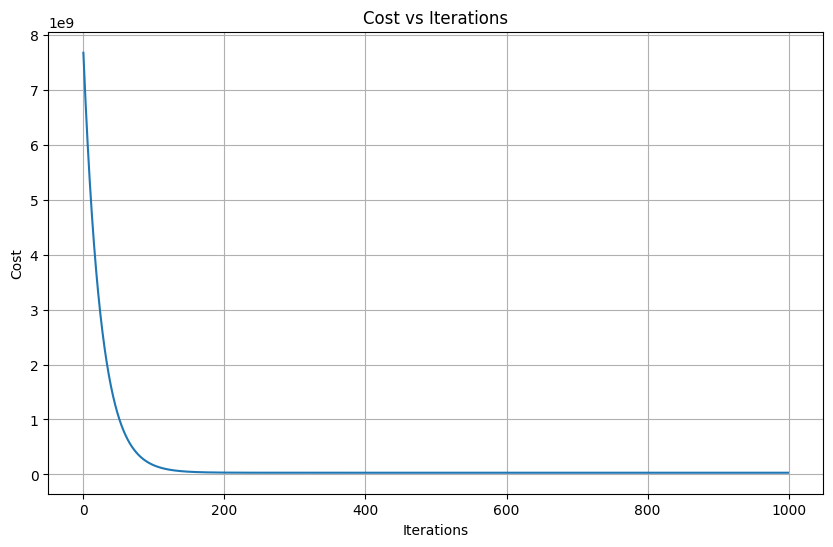

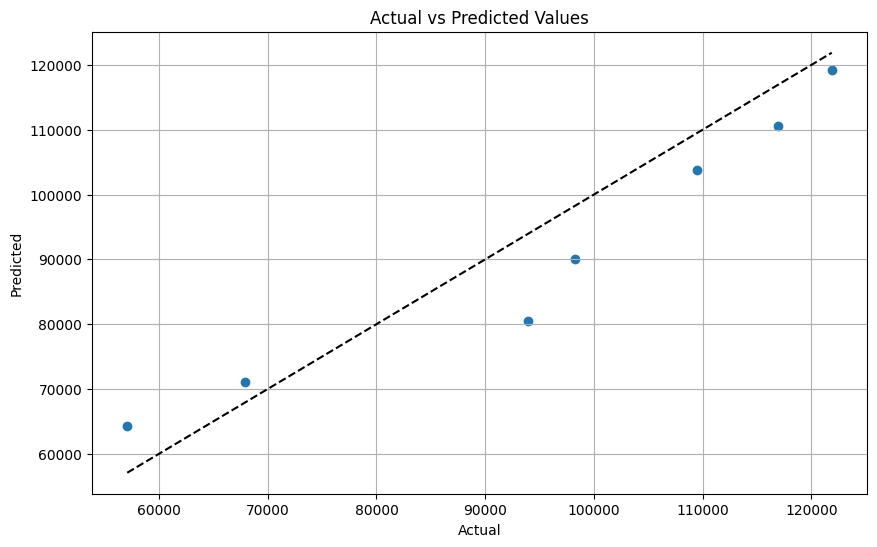

In [29]:
demo_with_real_data(salary_data[['YearsExperience']].values, salary_data['Salary'].values)

### Multiple Features Linear Regression Kaggle Example

In [30]:
!wget https://raw.githubusercontent.com/Jose-Codes/INIT_Intro_To_ML_Series/main/Lecture_2_Logistic_Regression_NNs/Student_Performance_Multiple_Linear_Regression.csv.zip

--2025-03-24 21:45:30--  https://raw.githubusercontent.com/Jose-Codes/INIT_Intro_To_ML_Series/main/Lecture_2_Logistic_Regression_NNs/Student_Performance_Multiple_Linear_Regression.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49477 (48K) [application/zip]
Saving to: ‘Student_Performance_Multiple_Linear_Regression.csv.zip.1’

Student_Performance 100%[===================>]  48.32K  --.-KB/s    in 0.01s   

2025-03-24 21:45:30 (3.78 MB/s) - ‘Student_Performance_Multiple_Linear_Regression.csv.zip.1’ saved [49477/49477]



In [31]:
!unzip /content/Student_Performance_Multiple_Linear_Regression.csv.zip

Archive:  /content/Student_Performance_Multiple_Linear_Regression.csv.zip
replace Student Performance Multiple Linear Regression.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Student Performance Multiple Linear Regression.csv  
replace __MACOSX/._Student Performance Multiple Linear Regression.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._Student Performance Multiple Linear Regression.csv  


In [32]:
student_performance_data = pd.read_csv("/content/Student Performance Multiple Linear Regression.csv")
student_performance_data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [33]:
student_performance_data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


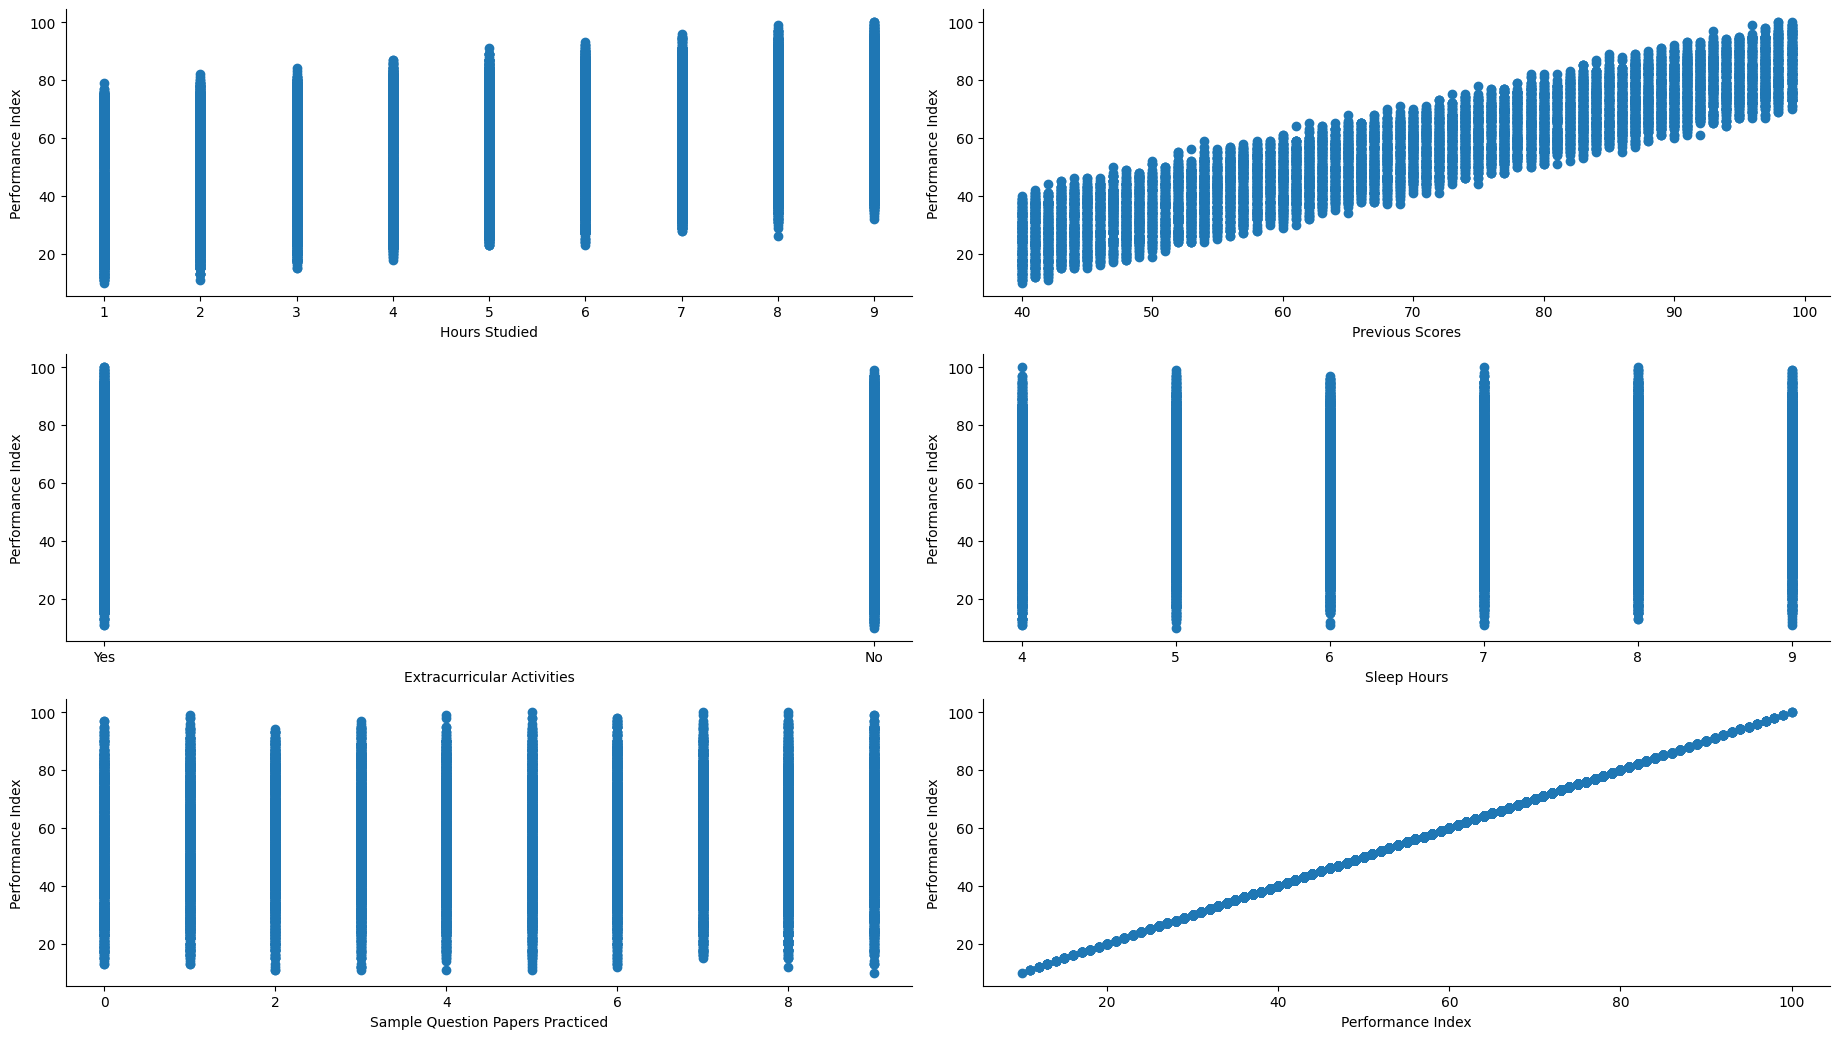

In [34]:
fig, ax = plt.subplots(3,2)
fig.set_size_inches(18.5, 10.5)

counter = 0
for i in range(ax.shape[0]):
  for j in range(ax.shape[1]):
    # The second argument to scatter should be the column name, not the column values.
    ax[i][j].scatter(student_performance_data[student_performance_data.columns[counter]],
          student_performance_data["Performance Index"]) # Changed this line

    ax[i][j].set_xlabel(student_performance_data.columns[counter])
    ax[i][j].set_ylabel("Performance Index")
    ax[i][j].spines[['top', 'right',]].set_visible(False)
    counter += 1

fig.tight_layout()
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'student_performance_data' is your DataFrame
le = LabelEncoder()
student_performance_data['Extracurricular Activities'] = le.fit_transform(student_performance_data['Extracurricular Activities'])

# Now 'Extracurricular Activities' column contains numerical values instead of strings
student_performance_data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


Iteration 100/1000, Cost: 67.058769
Iteration 200/1000, Cost: 5.279878
Iteration 300/1000, Cost: 4.189346
Iteration 400/1000, Cost: 4.170083
Iteration 500/1000, Cost: 4.169742
Iteration 600/1000, Cost: 4.169736
Iteration 700/1000, Cost: 4.169736
Iteration 800/1000, Cost: 4.169736
Iteration 900/1000, Cost: 4.169736
Iteration 1000/1000, Cost: 4.169736

Training R² score: 0.9887
Testing R² score: 0.9890
Learned weights: [ 7.40134077 17.63727123  0.30429076  0.81003107  0.54884172]
Learned bias: 55.3115


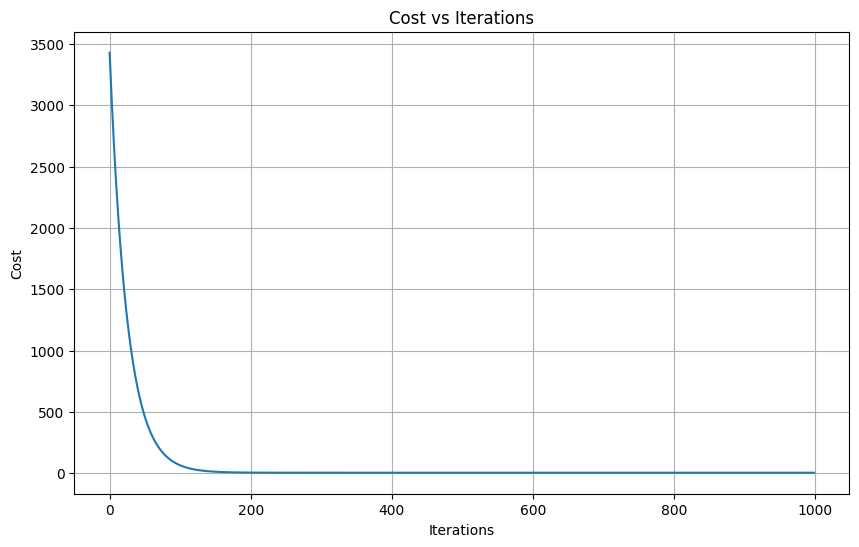

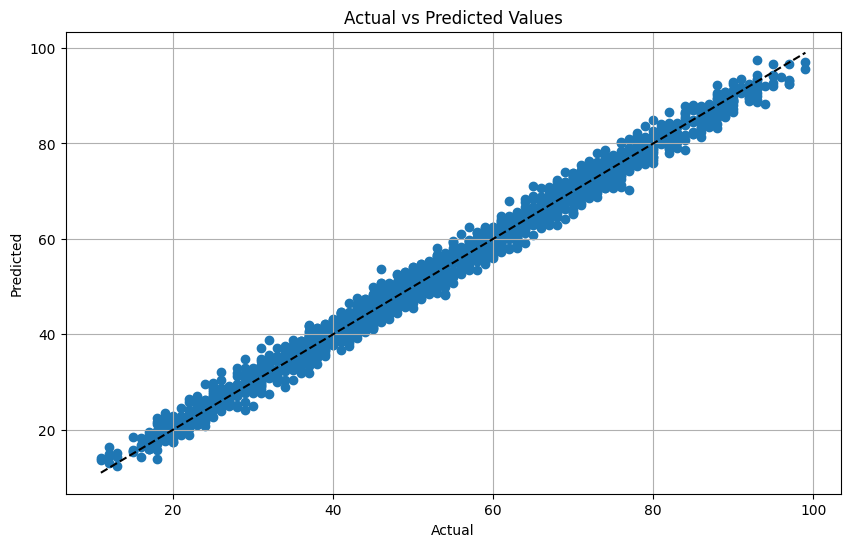

In [36]:
demo_with_real_data(student_performance_data.drop(columns=["Performance Index"]).values, student_performance_data["Performance Index"].values)

### Using SK Learn

In [ ]:
from sklearn.linear_model import LinearRegression

### Logistic Regression Model

In [37]:
class LogisticRegression:
    """
    A logistic regression classifier implemented from scratch.
    """

    def __init__(self):
        """
        Initialize the logistic regression model.
        """
        self.weights = None
        self.bias = None
        self.cost_history = []

    def initialize_parameters(self, n_features):
        """
        Initialize model parameters.

        Parameters:
            n_features (int): Number of features in the dataset
        """
        self.weights = np.zeros(n_features)
        self.bias = 0

    def sigmoid(self, z):
        """
        Compute the sigmoid function.

        Parameters:
            z (numpy.ndarray): Linear model output (w·x + b)

        Returns:
            numpy.ndarray: Sigmoid activation values
        """
        # Clip z to avoid overflow in exp
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def predict_proba(self, X):
        """
        Predict probability of positive class.

        Parameters:
            X (numpy.ndarray): Features matrix

        Returns:
            numpy.ndarray: Predicted probabilities
        """
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        """
        Make binary predictions.

        Parameters:
            X (numpy.ndarray): Features matrix
            threshold (float): Classification threshold

        Returns:
            numpy.ndarray: Binary predictions (0 or 1)
        """
        return (self.predict_proba(X) >= threshold).astype(int)

    def compute_cost(self, X, y):
        """
        Compute the binary cross-entropy loss.

        Parameters:
            X (numpy.ndarray): Features matrix
            y (numpy.ndarray): Target values

        Returns:
            float: Binary cross-entropy loss
        """
        n_samples = X.shape[0]
        y_pred = self.predict_proba(X)

        # Avoid log(0) by adding a small epsilon
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        # Binary cross-entropy formula
        cost = -1/n_samples * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return cost

    def compute_gradients(self, X, y):
        """
        Compute the gradients of the cost function with respect to weights and bias.

        Parameters:
            X (numpy.ndarray): Features matrix
            y (numpy.ndarray): Target values

        Returns:
            dict: Gradients for weights and bias
        """
        n_samples = X.shape[0]
        y_pred = self.predict_proba(X)

        # Gradient of binary cross-entropy
        dw = 1/n_samples * np.dot(X.T, (y_pred - y))
        db = 1/n_samples * np.sum(y_pred - y)

        return {'weights': dw, 'bias': db}

    def update_parameters(self, gradients, learning_rate):
        """
        Update model parameters using gradients.

        Parameters:
            gradients (dict): Gradients for weights and bias
            learning_rate (float): Learning rate for parameter updates
        """
        self.weights -= learning_rate * gradients['weights']
        self.bias -= learning_rate * gradients['bias']

    def fit(self, X, y, learning_rate=0.1, iterations=1000):
        """
        Train the model using gradient descent.

        Parameters:
            X (numpy.ndarray): Features matrix
            y (numpy.ndarray): Target values
            learning_rate (float): Learning rate for gradient descent
            iterations (int): Number of iterations for training

        Returns:
            self: The trained model
        """
        n_samples, n_features = X.shape

        # Initialize parameters if not done already
        if self.weights is None:
            self.initialize_parameters(n_features)

        # Gradient Descent
        for i in range(iterations):
            # Compute gradients and cost
            gradients = self.compute_gradients(X, y)
            cost = self.compute_cost(X, y)

            # Update parameters
            self.update_parameters(gradients, learning_rate)

            # Record cost
            self.cost_history.append(cost)

            # Print cost every 100 iterations
            if (i + 1) % 100 == 0:
                print(f'Iteration {i+1}/{iterations}, Cost: {cost:.6f}')

        return self

    def score(self, X, y):
        """
        Calculate the accuracy.

        Parameters:
            X (numpy.ndarray): Features matrix
            y (numpy.ndarray): Target values

        Returns:
            float: Accuracy score
        """
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy

    def plot_cost_history(self):
        """
        Plot the cost history during training.
        """
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(self.cost_history)), self.cost_history)
        plt.title('Cost vs Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Binary Cross-Entropy Loss')
        plt.grid(True)
        plt.show()

    def plot_decision_boundary(self, X, y):
        """
        Plot the decision boundary (works only for 2D data).

        Parameters:
            X (numpy.ndarray): Features matrix (2D)
            y (numpy.ndarray): Target values
        """
        if X.shape[1] != 2:
            print("Decision boundary plotting only works for 2D data")
            return

        plt.figure(figsize=(10, 6))

        # Create a mesh grid
        h = 0.02  # Step size
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Predict class for each point in the mesh
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot the decision boundary
        plt.contourf(xx, yy, Z, alpha=0.3)

        # Plot the data points
        for i, c in zip([0, 1], ['red', 'blue']):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=c, edgecolor='k', label=f'Class {i}')

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Decision Boundary')
        plt.legend()
        plt.show()

In [44]:
from sklearn.datasets import make_classification, make_regression

In [41]:
# Example usage:
def demo_logistic_regression():
    """
    Demonstrate the LogisticRegression class with synthetic data.
    """
    # Generate synthetic data
    X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                               n_informative=2, random_state=42,
                               n_clusters_per_class=1)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model
    model = LogisticRegression()
    model.fit(X_train_scaled, y_train, learning_rate=0.1, iterations=1000)

    # Evaluate model
    train_accuracy = model.score(X_train_scaled, y_train)
    test_accuracy = model.score(X_test_scaled, y_test)

    print(f"\nTraining Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Learned weights: {model.weights}")
    print(f"Learned bias: {model.bias:.4f}")

    # Plot cost history
    model.plot_cost_history()

    # Plot decision boundary
    model.plot_decision_boundary(X_train_scaled, y_train)

Iteration 100/1000, Cost: 0.410223
Iteration 200/1000, Cost: 0.382609
Iteration 300/1000, Cost: 0.374954
Iteration 400/1000, Cost: 0.372125
Iteration 500/1000, Cost: 0.370931
Iteration 600/1000, Cost: 0.370389
Iteration 700/1000, Cost: 0.370132
Iteration 800/1000, Cost: 0.370005
Iteration 900/1000, Cost: 0.369942
Iteration 1000/1000, Cost: 0.369911

Training Accuracy: 0.8562
Testing Accuracy: 0.8750
Learned weights: [ 2.70055382 -0.6277885 ]
Learned bias: 0.1713


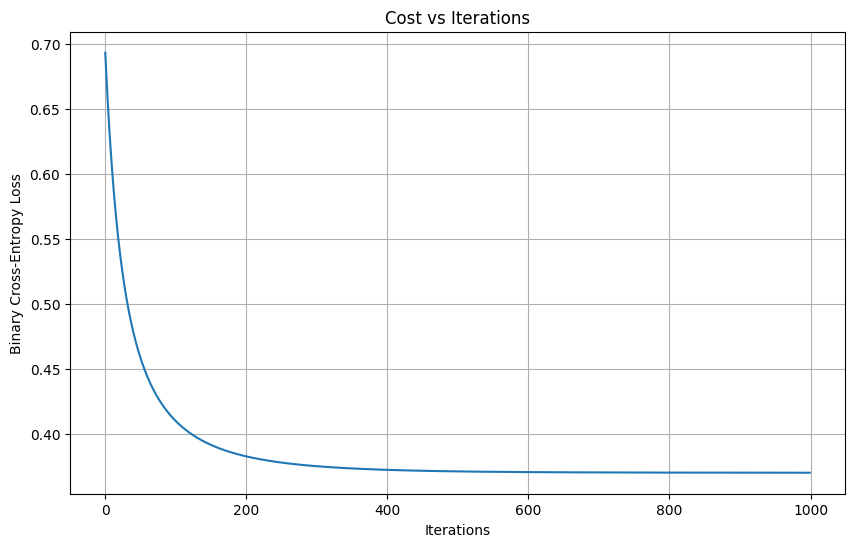

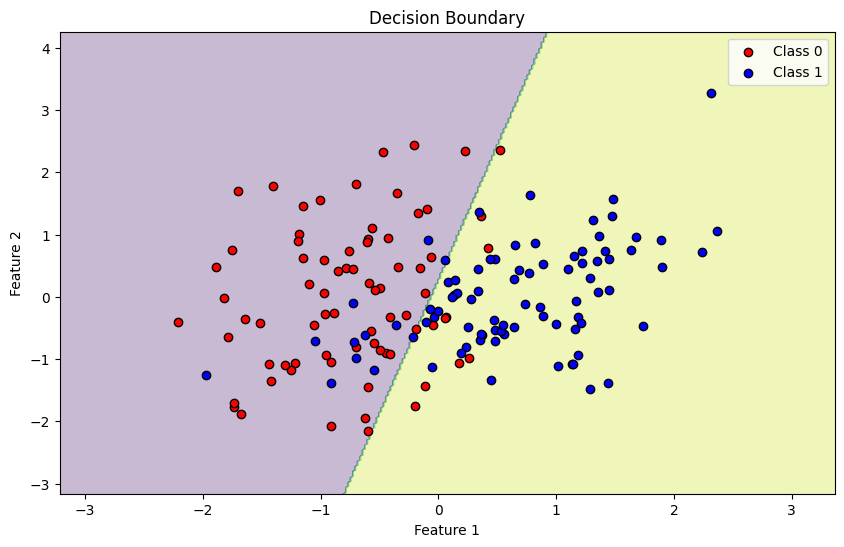

In [42]:
demo_logistic_regression()

### Vectorized (parallelism) V.S. Iterative Models performance comparison

In [48]:
import time

#### Linear Regression Iterative

In [45]:
class LinearRegression_Iterative:
    """
    Linear regression with iterative operations (using loops)
    """
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def initialize_parameters(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def predict(self, X):
        n_samples = X.shape[0]
        predictions = np.zeros(n_samples)

        for i in range(n_samples):
            prediction = self.bias
            for j in range(X.shape[1]):
                prediction += X[i, j] * self.weights[j]
            predictions[i] = prediction

        return predictions

    def compute_cost(self, X, y):
        n_samples = X.shape[0]
        predictions = self.predict(X)

        sum_squared_error = 0
        for i in range(n_samples):
            sum_squared_error += (predictions[i] - y[i]) ** 2

        cost = (1 / (2 * n_samples)) * sum_squared_error
        return cost

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.initialize_parameters(n_features)

        # Gradient Descent
        execution_time = time.time()

        for iteration in range(self.iterations):
            # Predict
            y_pred = self.predict(X)

            # Compute gradients
            dw = np.zeros(n_features)
            db = 0

            for i in range(n_samples):
                error = y_pred[i] - y[i]
                db += error

                for j in range(n_features):
                    dw[j] += error * X[i, j]

            dw = dw / n_samples
            db = db / n_samples

            # Update parameters
            for j in range(n_features):
                self.weights[j] -= self.learning_rate * dw[j]
            self.bias -= self.learning_rate * db

            # Record cost
            cost = self.compute_cost(X, y)
            self.cost_history.append(cost)

        execution_time = time.time() - execution_time
        return execution_time

#### Linear Regression Vectorized (Using np.dot)

In [49]:
class LinearRegression_Vectorized:
    """
    Linear regression with vectorized operations
    """
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def initialize_parameters(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def compute_cost(self, X, y):
        n_samples = X.shape[0]
        predictions = self.predict(X)
        cost = (1 / (2 * n_samples)) * np.sum((predictions - y) ** 2)
        return cost

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.initialize_parameters(n_features)

        # Gradient Descent
        execution_time = time.time()

        for i in range(self.iterations):
            # Vectorized operations
            y_pred = self.predict(X)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Record cost
            cost = self.compute_cost(X, y)
            self.cost_history.append(cost)

        execution_time = time.time() - execution_time
        return execution_time

#### Logistic Regression Iterative

In [46]:
class LogisticRegression_Iterative:
    """
    Logistic regression with iterative operations (using loops)
    """
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def initialize_parameters(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)  # Prevent overflow
        return 1 / (1 + np.exp(-z))

    def predict_proba(self, X):
        n_samples = X.shape[0]
        probabilities = np.zeros(n_samples)

        for i in range(n_samples):
            z = self.bias
            for j in range(X.shape[1]):
                z += X[i, j] * self.weights[j]
            probabilities[i] = self.sigmoid(z)

        return probabilities

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

    def compute_cost(self, X, y):
        n_samples = X.shape[0]
        y_pred = self.predict_proba(X)

        # Avoid log(0)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        # Binary cross-entropy
        cost = 0
        for i in range(n_samples):
            cost += y[i] * np.log(y_pred[i]) + (1 - y[i]) * np.log(1 - y_pred[i])

        cost = -1/n_samples * cost
        return cost

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.initialize_parameters(n_features)

        # Gradient Descent
        execution_time = time.time()

        for iteration in range(self.iterations):
            # Predict
            y_pred = self.predict_proba(X)

            # Compute gradients
            dw = np.zeros(n_features)
            db = 0

            for i in range(n_samples):
                error = y_pred[i] - y[i]
                db += error

                for j in range(n_features):
                    dw[j] += error * X[i, j]

            dw = dw / n_samples
            db = db / n_samples

            # Update parameters
            for j in range(n_features):
                self.weights[j] -= self.learning_rate * dw[j]
            self.bias -= self.learning_rate * db

            # Record cost
            cost = self.compute_cost(X, y)
            self.cost_history.append(cost)

        execution_time = time.time() - execution_time
        return execution_time

#### Logistic Regression Vectorized

In [47]:
class LogisticRegression_Vectorized:
    """
    Logistic regression with vectorized operations
    """
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def initialize_parameters(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)  # Prevent overflow
        return 1 / (1 + np.exp(-z))

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

    def compute_cost(self, X, y):
        n_samples = X.shape[0]
        y_pred = self.predict_proba(X)

        # Avoid log(0)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        # Binary cross-entropy
        cost = -1/n_samples * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return cost

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.initialize_parameters(n_features)

        # Gradient Descent
        execution_time = time.time()

        for i in range(self.iterations):
            # Vectorized operations
            y_pred = self.predict_proba(X)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Record cost
            cost = self.compute_cost(X, y)
            self.cost_history.append(cost)

        execution_time = time.time() - execution_time
        return execution_time

#### Performance Comparison

In [52]:
def run_performance_test(n_samples_list, n_features_list):
    """
    Run performance tests comparing vectorized and iterative implementations
    for different dataset sizes.
    """
    # Prepare results containers
    linear_vectorized_times = []
    linear_iterative_times = []
    linear_speedup = []

    logistic_vectorized_times = []
    logistic_iterative_times = []
    logistic_speedup = []

    # For dataset size comparison
    features = 10  # Fix number of features
    sample_results = []

    print("Testing performance with varying dataset sizes...")
    for samples in n_samples_list:
        print(f"  Running with {samples} samples and {features} features")

        # Generate data for linear regression
        X_linear, y_linear = make_regression(n_samples=samples, n_features=features,
                                            noise=0.1, random_state=42)

        # Generate data for logistic regression
        X_logistic, y_logistic = make_classification(n_samples=samples,
                                                   n_features=features,
                                                   n_informative=min(features, 2),  # Adjust if needed
                                                   n_redundant=min(features - min(features, 2), 2), # Adjust if needed
                                                   n_repeated=0,  # Adjust if needed
                                                   random_state=42)

        # Scale features
        scaler = StandardScaler()
        X_linear = scaler.fit_transform(X_linear)
        X_logistic = scaler.fit_transform(X_logistic)

        # Set parameters for fair comparison
        iterations = 100  # Reduce for larger datasets

        # Linear Regression comparison
        linear_vec = LinearRegression_Vectorized(learning_rate=0.01, iterations=iterations)
        linear_iter = LinearRegression_Iterative(learning_rate=0.01, iterations=iterations)

        time_vec = linear_vec.fit(X_linear, y_linear)
        time_iter = linear_iter.fit(X_linear, y_linear)

        # Logistic Regression comparison
        logistic_vec = LogisticRegression_Vectorized(learning_rate=0.1, iterations=iterations)
        logistic_iter = LogisticRegression_Iterative(learning_rate=0.1, iterations=iterations)

        time_vec_log = logistic_vec.fit(X_logistic, y_logistic)
        time_iter_log = logistic_iter.fit(X_logistic, y_logistic)

        # Store results
        sample_results.append({
            'samples': samples,
            'features': features,
            'linear_vec_time': time_vec,
            'linear_iter_time': time_iter,
            'linear_speedup': time_iter / time_vec,
            'logistic_vec_time': time_vec_log,
            'logistic_iter_time': time_iter_log,
            'logistic_speedup': time_iter_log / time_vec_log
        })

    # For feature size comparison
    samples = 1000  # Fix number of samples
    feature_results = []

    print("\nTesting performance with varying feature dimensions...")
    for features in n_features_list:
        print(f"  Running with {samples} samples and {features} features")

        # Generate data
        X_linear, y_linear = make_regression(n_samples=samples, n_features=features,
                                            noise=0.1, random_state=42)

        X_logistic, y_logistic = make_classification(n_samples=samples, n_features=features,
                                                   random_state=42)

        # Scale features
        scaler = StandardScaler()
        X_linear = scaler.fit_transform(X_linear)
        X_logistic = scaler.fit_transform(X_logistic)

        # Set parameters for fair comparison
        iterations = 100

        # Linear Regression comparison
        linear_vec = LinearRegression_Vectorized(learning_rate=0.01, iterations=iterations)
        linear_iter = LinearRegression_Iterative(learning_rate=0.01, iterations=iterations)

        time_vec = linear_vec.fit(X_linear, y_linear)
        time_iter = linear_iter.fit(X_linear, y_linear)

        # Logistic Regression comparison
        logistic_vec = LogisticRegression_Vectorized(learning_rate=0.1, iterations=iterations)
        logistic_iter = LogisticRegression_Iterative(learning_rate=0.1, iterations=iterations)

        time_vec_log = logistic_vec.fit(X_logistic, y_logistic)
        time_iter_log = logistic_iter.fit(X_logistic, y_logistic)

        # Store results
        feature_results.append({
            'samples': samples,
            'features': features,
            'linear_vec_time': time_vec,
            'linear_iter_time': time_iter,
            'linear_speedup': time_iter / time_vec,
            'logistic_vec_time': time_vec_log,
            'logistic_iter_time': time_iter_log,
            'logistic_speedup': time_iter_log / time_vec_log
        })

    return sample_results, feature_results


def plot_results(sample_results, feature_results):
    """
    Plot performance comparison results.
    """
    # Extract data for plotting
    samples = [r['samples'] for r in sample_results]
    linear_vec_times = [r['linear_vec_time'] for r in sample_results]
    linear_iter_times = [r['linear_iter_time'] for r in sample_results]
    linear_speedups = [r['linear_speedup'] for r in sample_results]

    logistic_vec_times = [r['logistic_vec_time'] for r in sample_results]
    logistic_iter_times = [r['logistic_iter_time'] for r in sample_results]
    logistic_speedups = [r['logistic_speedup'] for r in sample_results]

    features = [r['features'] for r in feature_results]
    linear_vec_times_f = [r['linear_vec_time'] for r in feature_results]
    linear_iter_times_f = [r['linear_iter_time'] for r in feature_results]
    linear_speedups_f = [r['linear_speedup'] for r in feature_results]

    logistic_vec_times_f = [r['logistic_vec_time'] for r in feature_results]
    logistic_iter_times_f = [r['logistic_iter_time'] for r in feature_results]
    logistic_speedups_f = [r['logistic_speedup'] for r in feature_results]

    # Plot execution time comparison by dataset size
    plt.figure(figsize=(20, 15))

    # Linear Regression time comparison (samples)
    plt.subplot(2, 2, 1)
    plt.plot(samples, linear_vec_times, 'o-', label='Vectorized')
    plt.plot(samples, linear_iter_times, 'o-', label='Iterative')
    plt.title('Linear Regression: Execution Time vs. Dataset Size')
    plt.xlabel('Number of Samples')
    plt.ylabel('Execution Time (seconds)')
    plt.grid(True)
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')

    # Logistic Regression time comparison (samples)
    plt.subplot(2, 2, 2)
    plt.plot(samples, logistic_vec_times, 'o-', label='Vectorized')
    plt.plot(samples, logistic_iter_times, 'o-', label='Iterative')
    plt.title('Logistic Regression: Execution Time vs. Dataset Size')
    plt.xlabel('Number of Samples')
    plt.ylabel('Execution Time (seconds)')
    plt.grid(True)
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')

    # Linear Regression speedup (samples)
    plt.subplot(2, 2, 3)
    plt.plot(samples, linear_speedups, 'o-')
    plt.axhline(y=1, color='r', linestyle='--')
    plt.title('Linear Regression: Speedup Factor vs. Dataset Size')
    plt.xlabel('Number of Samples')
    plt.ylabel('Speedup (Iterative Time / Vectorized Time)')
    plt.grid(True)
    plt.xscale('log')

    # Logistic Regression speedup (samples)
    plt.subplot(2, 2, 4)
    plt.plot(samples, logistic_speedups, 'o-')
    plt.axhline(y=1, color='r', linestyle='--')
    plt.title('Logistic Regression: Speedup Factor vs. Dataset Size')
    plt.xlabel('Number of Samples')
    plt.ylabel('Speedup (Iterative Time / Vectorized Time)')
    plt.grid(True)
    plt.xscale('log')

    plt.tight_layout()
    plt.savefig('performance_comparison_samples.png')
    plt.show()

    # Plot execution time comparison by feature dimension
    plt.figure(figsize=(20, 15))

    # Linear Regression time comparison (features)
    plt.subplot(2, 2, 1)
    plt.plot(features, linear_vec_times_f, 'o-', label='Vectorized')
    plt.plot(features, linear_iter_times_f, 'o-', label='Iterative')
    plt.title('Linear Regression: Execution Time vs. Feature Dimension')
    plt.xlabel('Number of Features')
    plt.ylabel('Execution Time (seconds)')
    plt.grid(True)
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')

    # Logistic Regression time comparison (features)
    plt.subplot(2, 2, 2)
    plt.plot(features, logistic_vec_times_f, 'o-', label='Vectorized')
    plt.plot(features, logistic_iter_times_f, 'o-', label='Iterative')
    plt.title('Logistic Regression: Execution Time vs. Feature Dimension')
    plt.xlabel('Number of Features')
    plt.ylabel('Execution Time (seconds)')
    plt.grid(True)
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')

    # Linear Regression speedup (features)
    plt.subplot(2, 2, 3)
    plt.plot(features, linear_speedups_f, 'o-')
    plt.axhline(y=1, color='r', linestyle='--')
    plt.title('Linear Regression: Speedup Factor vs. Feature Dimension')
    plt.xlabel('Number of Features')
    plt.ylabel('Speedup (Iterative Time / Vectorized Time)')
    plt.grid(True)
    plt.xscale('log')

    # Logistic Regression speedup (features)
    plt.subplot(2, 2, 4)
    plt.plot(features, logistic_speedups_f, 'o-')
    plt.axhline(y=1, color='r', linestyle='--')
    plt.title('Logistic Regression: Speedup Factor vs. Feature Dimension')
    plt.xlabel('Number of Features')
    plt.ylabel('Speedup (Iterative Time / Vectorized Time)')
    plt.grid(True)
    plt.xscale('log')

    plt.tight_layout()
    plt.savefig('performance_comparison_features.png')
    plt.show()

    # Print summary statistics
    print("\nPerformance Summary:")
    print(f"Average Linear Regression Speedup (by samples): {np.mean(linear_speedups):.2f}x")
    print(f"Average Logistic Regression Speedup (by samples): {np.mean(logistic_speedups):.2f}x")
    print(f"Average Linear Regression Speedup (by features): {np.mean(linear_speedups_f):.2f}x")
    print(f"Average Logistic Regression Speedup (by features): {np.mean(logistic_speedups_f):.2f}x")


def compare_cost_convergence():
    """
    Compare cost convergence between vectorized and iterative implementations.
    """
    # Generate data
    np.random.seed(42)
    X_linear, y_linear = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
    X_logistic, y_logistic = make_classification(n_samples=1000, n_features=10, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_linear = scaler.fit_transform(X_linear)
    X_logistic = scaler.fit_transform(X_logistic)

    # Run Linear Regression models
    linear_vec = LinearRegression_Vectorized(learning_rate=0.01, iterations=1000)
    linear_iter = LinearRegression_Iterative(learning_rate=0.01, iterations=1000)

    linear_vec.fit(X_linear, y_linear)
    linear_iter.fit(X_linear, y_linear)

    # Run Logistic Regression models
    logistic_vec = LogisticRegression_Vectorized(learning_rate=0.1, iterations=1000)
    logistic_iter = LogisticRegression_Iterative(learning_rate=0.1, iterations=1000)

    logistic_vec.fit(X_logistic, y_logistic)
    logistic_iter.fit(X_logistic, y_logistic)

    # Plot cost history comparison
    plt.figure(figsize=(15, 10))

    # Linear Regression cost comparison
    plt.subplot(2, 1, 1)
    plt.plot(linear_vec.cost_history, label='Vectorized')
    plt.plot(linear_iter.cost_history, label='Iterative')
    plt.title('Linear Regression: Cost Convergence Comparison')
    plt.xlabel('Iterations')
    plt.ylabel('Cost (MSE)')
    plt.grid(True)
    plt.legend()

    # Logistic Regression cost comparison
    plt.subplot(2, 1, 2)
    plt.plot(logistic_vec.cost_history, label='Vectorized')
    plt.plot(logistic_iter.cost_history, label='Iterative')
    plt.title('Logistic Regression: Cost Convergence Comparison')
    plt.xlabel('Iterations')
    plt.ylabel('Cost (Binary Cross-Entropy)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.savefig('cost_convergence_comparison.png')
    plt.show()

    # Print numerical comparison
    print("\nCost Convergence Summary:")
    print(f"Linear Regression Final Cost (Vectorized): {linear_vec.cost_history[-1]:.6f}")
    print(f"Linear Regression Final Cost (Iterative): {linear_iter.cost_history[-1]:.6f}")
    print(f"Logistic Regression Final Cost (Vectorized): {logistic_vec.cost_history[-1]:.6f}")
    print(f"Logistic Regression Final Cost (Iterative): {logistic_iter.cost_history[-1]:.6f}")

Testing performance with varying dataset sizes...
  Running with 100 samples and 10 features
  Running with 500 samples and 10 features
  Running with 1000 samples and 10 features
  Running with 5000 samples and 10 features
  Running with 10000 samples and 10 features

Testing performance with varying feature dimensions...
  Running with 1000 samples and 5 features
  Running with 1000 samples and 10 features
  Running with 1000 samples and 20 features
  Running with 1000 samples and 50 features
  Running with 1000 samples and 100 features


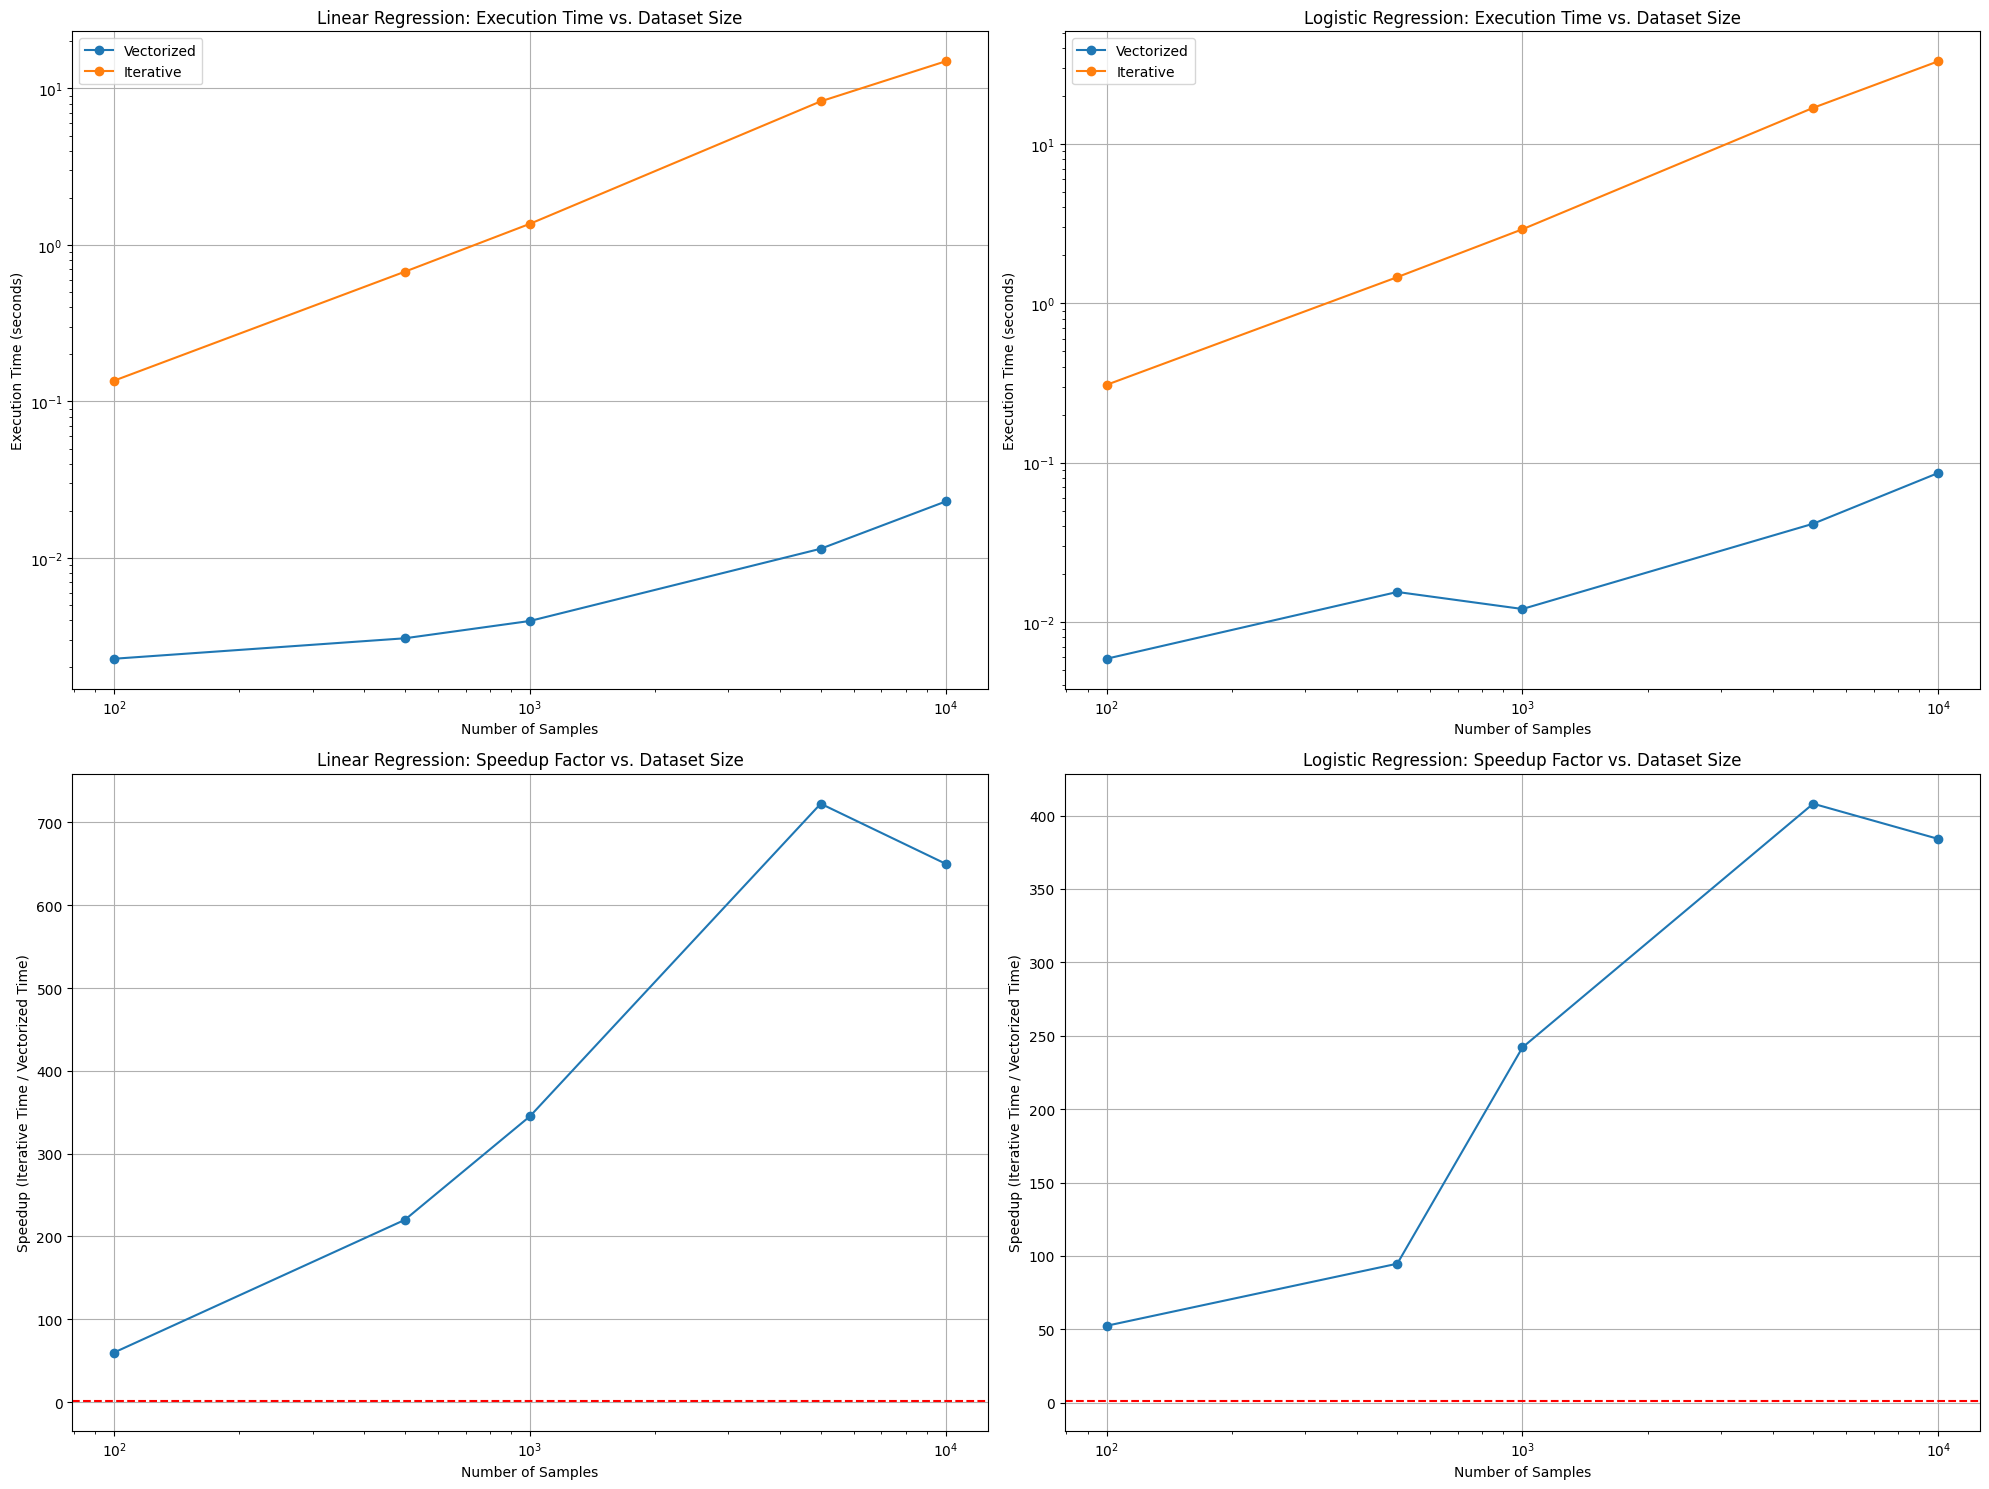

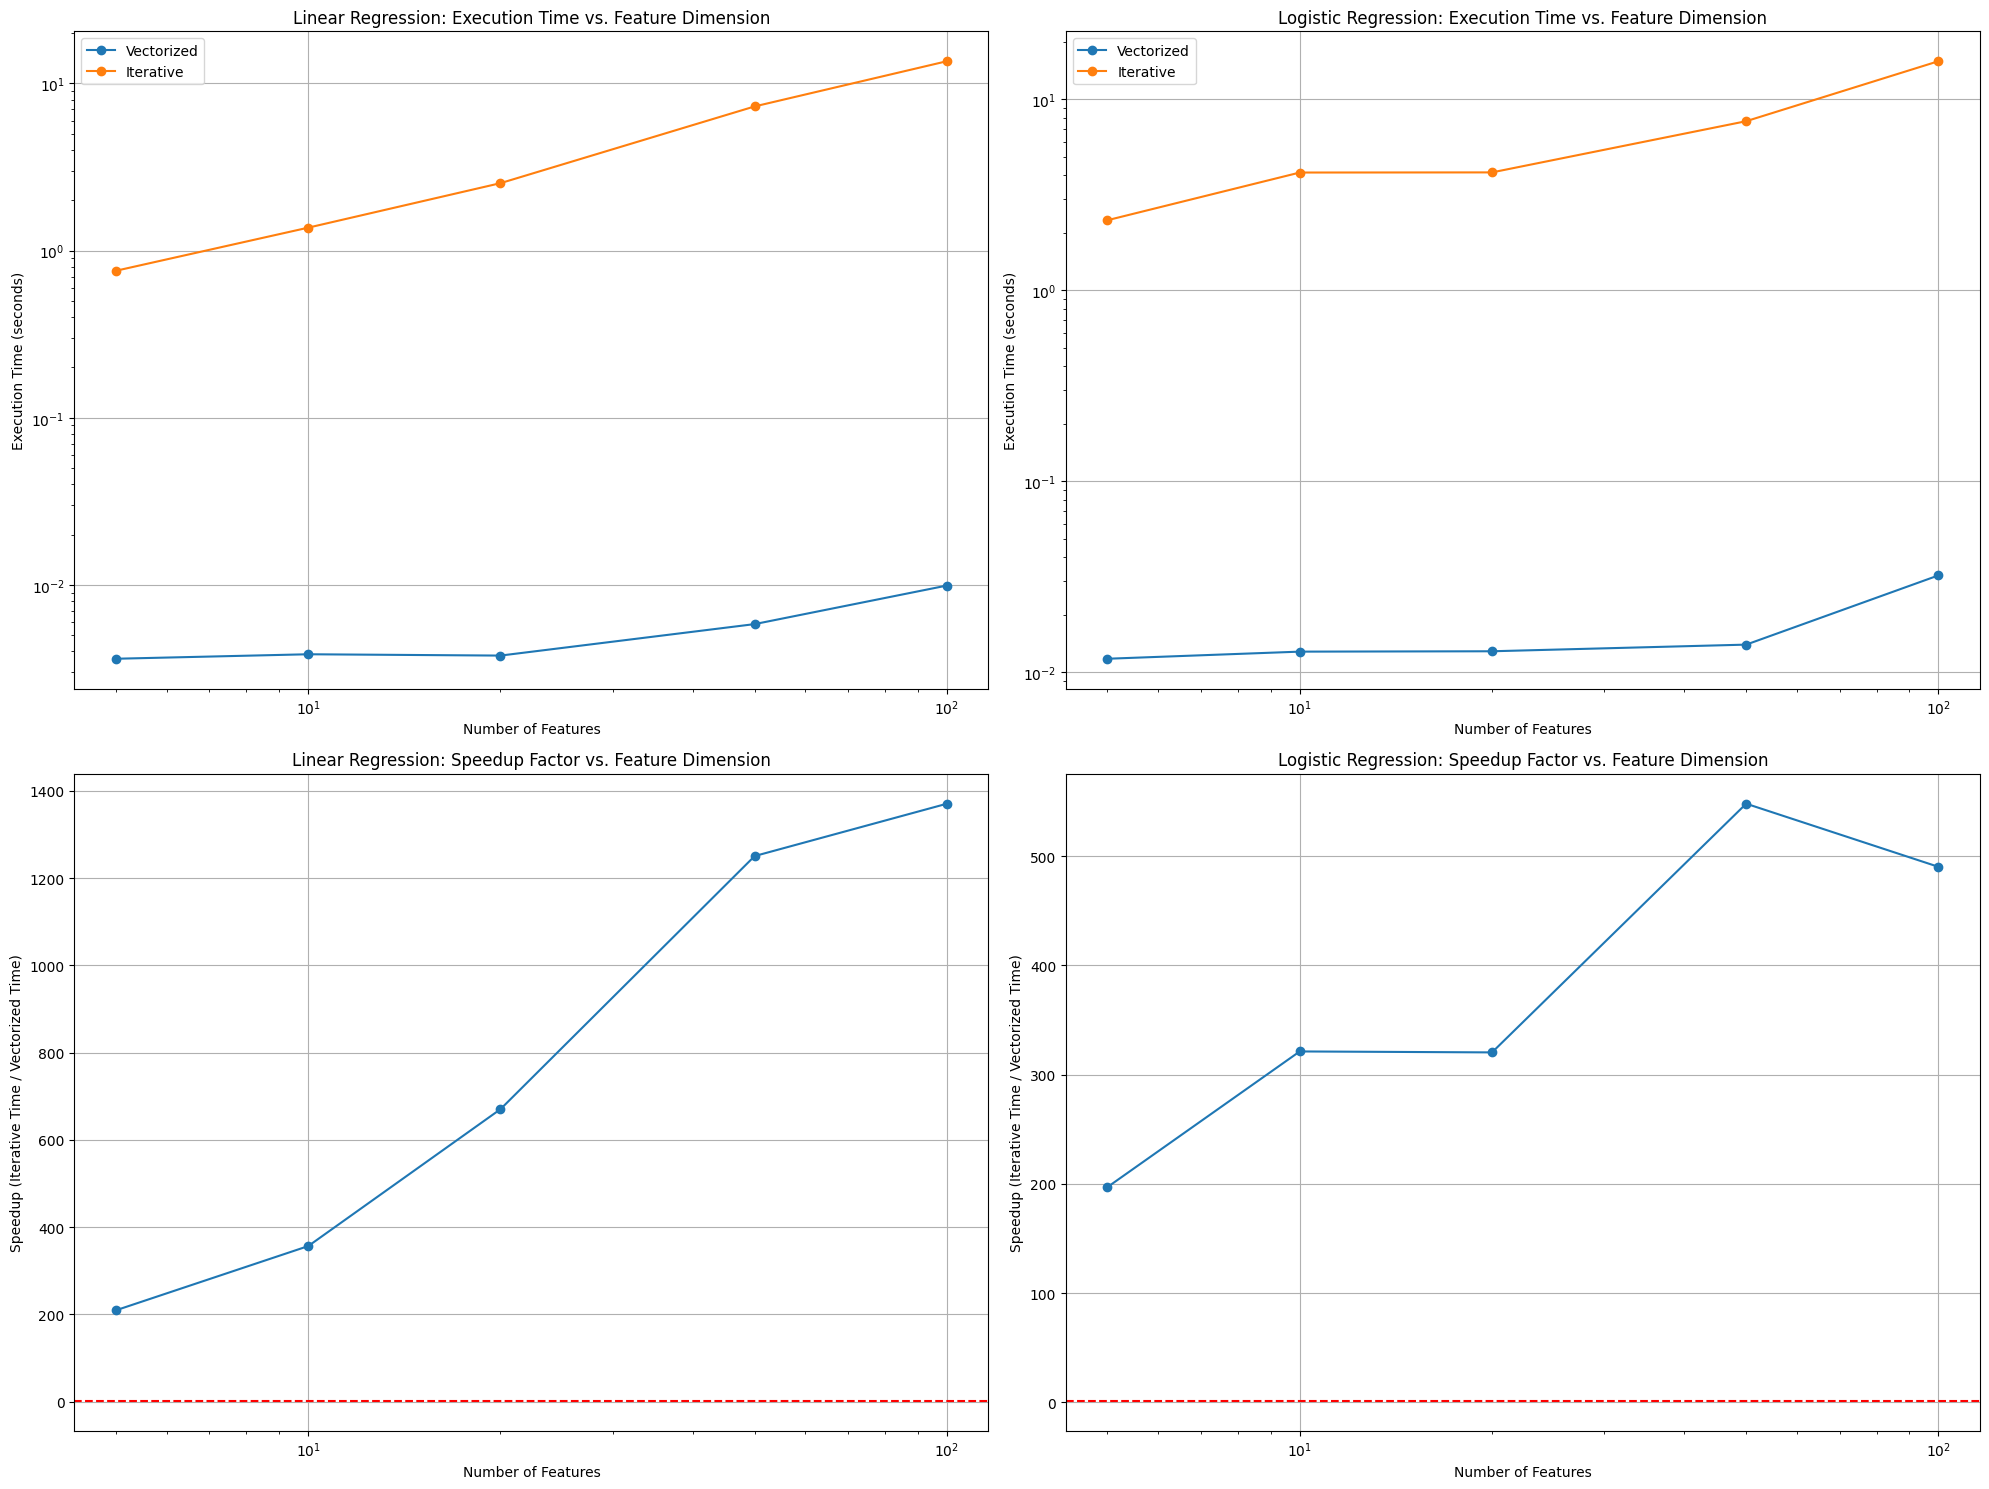


Performance Summary:
Average Linear Regression Speedup (by samples): 399.50x
Average Logistic Regression Speedup (by samples): 236.25x
Average Linear Regression Speedup (by features): 771.49x
Average Logistic Regression Speedup (by features): 375.36x


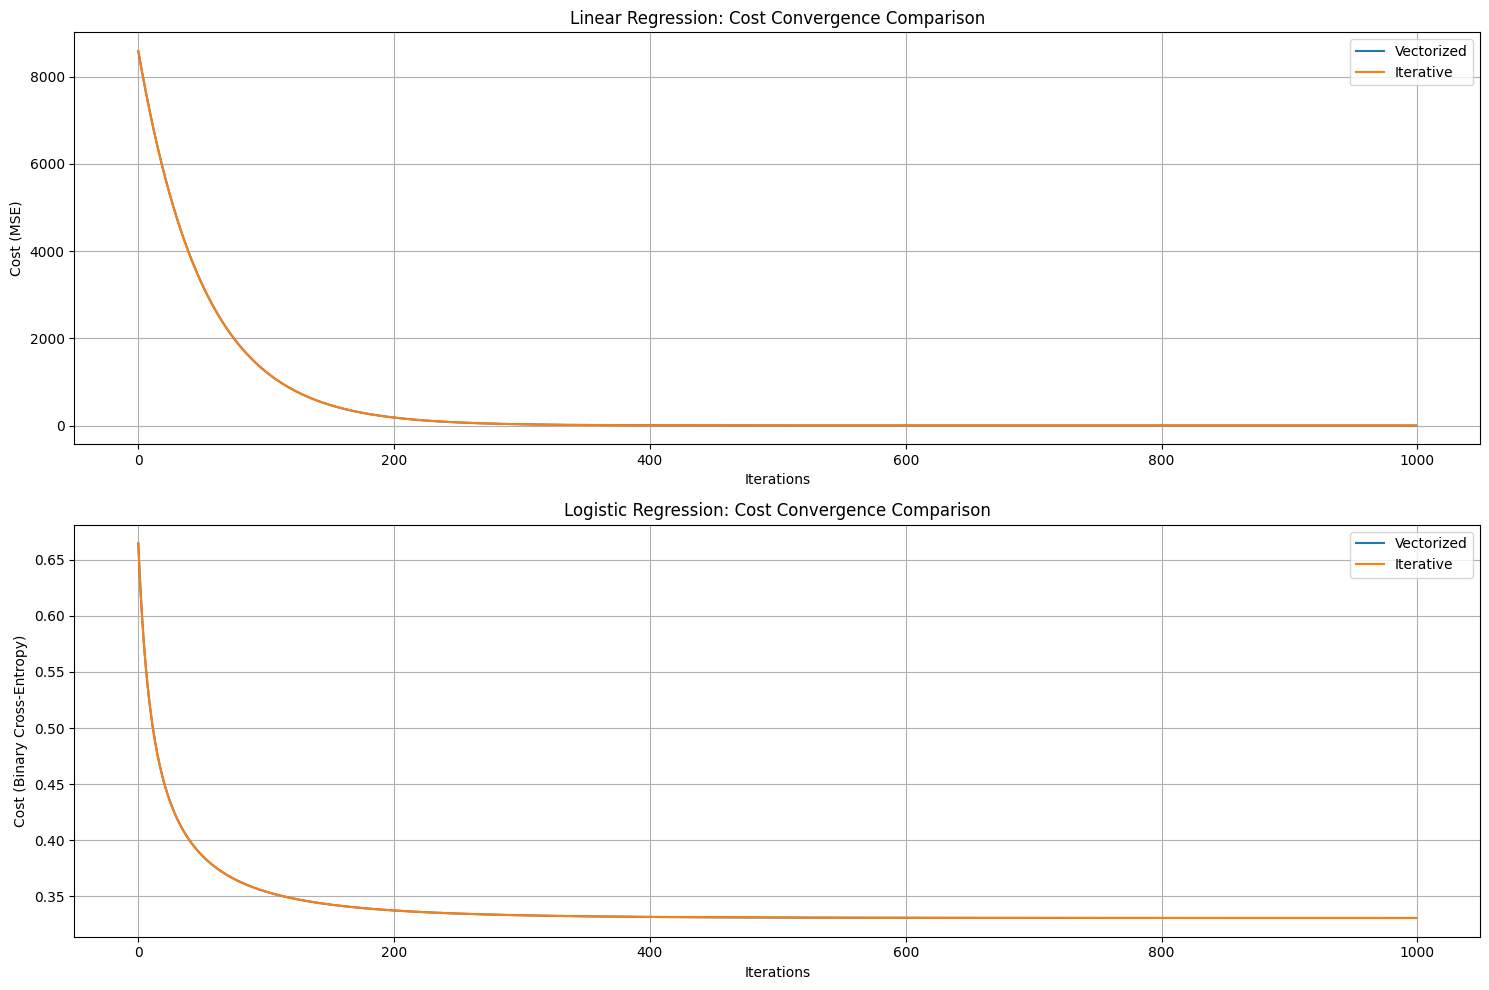


Cost Convergence Summary:
Linear Regression Final Cost (Vectorized): 0.004733
Linear Regression Final Cost (Iterative): 0.004733
Logistic Regression Final Cost (Vectorized): 0.330846
Logistic Regression Final Cost (Iterative): 0.330846


In [54]:
    # Set random seed for reproducibility
    np.random.seed(42)

    # Define test parameters
    n_samples_list = [100, 500, 1000, 5000, 10000]
    n_features_list = [5, 10, 20, 50, 100]

    # Run performance tests
    sample_results, feature_results = run_performance_test(n_samples_list, n_features_list)

    # Plot and print results
    plot_results(sample_results, feature_results)

    # Compare cost convergence
    compare_cost_convergence()